## 4.1 확률과 통계 학습을 위한 사전 준비

### 4.1.1 학습을 위한 사전 지식

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
%precision 3

'%.3f'

In [2]:
np.random.seed(0)

In [3]:
dice_data = np.array([1,2,3,4,5,6])
print('숫자 하나만 무작위 추출:', np.random.choice(dice_data, 1))

숫자 하나만 무작위 추출: [5]


### 4.2.2 통계적 확률

In [4]:
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)
prob_data = np.array([])

In [5]:
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)
    print(i,'가 나올 확률',p)

1 가 나올 확률 0.171
2 가 나올 확률 0.158
3 가 나올 확률 0.157
4 가 나올 확률 0.183
5 가 나올 확률 0.16
6 가 나올 확률 0.171


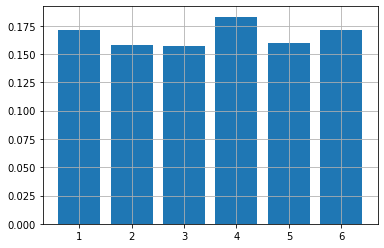

In [6]:
plt.bar(dice_data, prob_data)
plt.grid(True)

### 4.5.1 대수 법칙

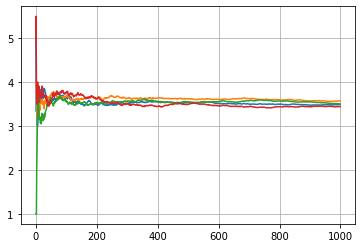

In [7]:
calc_times = 1000
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

### 4.5.2 중심극한정리

In [8]:
def function_central_theory(N):    
    mean_array = np.array([])

    for i in range(1000):
        cum_variables = np.random.choice(np.array([1,2,3,4,5,6]), N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1]/N)

    plt.hist(mean_array)
    plt.grid(True)

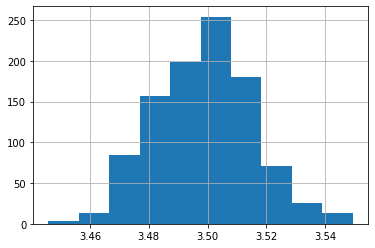

In [9]:
function_central_theory(10000)

### 4.5.3 표본분포

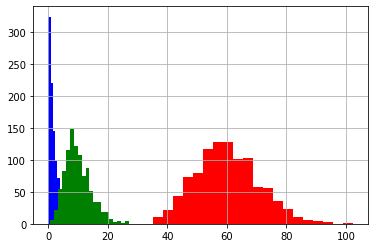

In [17]:
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c) 
    plt.grid(True)

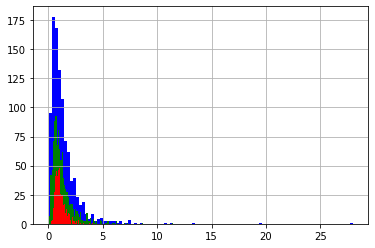

In [18]:
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000) 
    plt.hist(x, 100, color=c) 
    plt.grid(True)

In [19]:
student_data_math = pd.read_csv('./data/student-mat.csv', sep=';')
student_data_por = pd.read_csv('./data/student-por.csv', sep=';')

In [23]:
student_data_merge = pd.merge(
    student_data_math, 
    student_data_por, 
    on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'], 
    suffixes=['_math', '_por'])

In [24]:
print('G1 수학 성적 평균', student_data_merge.G1_math.mean())
print('G1 포르투칼 성적 평균', student_data_merge.G1_por.mean())

G1 수학 성적 평균 10.861256544502618
G1 포르투칼 성적 평균 12.112565445026178


In [27]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p값 =', p)

p값 = 1.6536555217100788e-16
